## Project 1

Enter your email: ezeugwunweze22@gmail.com
Enter your age: 85
The categories are:
--  Contemporary
--  Modern
--  Traditional 
Enter category: Traditional

Here are the images in the traditional category
['benin_head', 'benin_king_bust', 'benin_queen_bust', 'benin_royal_head', 'female_nok_head', 'gelede_headdress', 'ife_bronze_head', 'igbo-ukwu_art', 'male_nok_head', 'portugese_soldier', 'royal_court_chief', 'traditional_bell', 'yoruba_human_face']
Enter the image you want to transform: traditional_bell

Now that you have selected the image you want to transform,
Below are the image transfromations you can perform on this image:

1. Image blurring 
2. Shearing on X-Axis 
3. Shearing on Y-Axis 
4. Cropping 
5. Rotation 
6. Reflection 
7. Translation

Note: Please enter the number associated with the transformation to choose the one you desire.

Enter number of transformation: 7


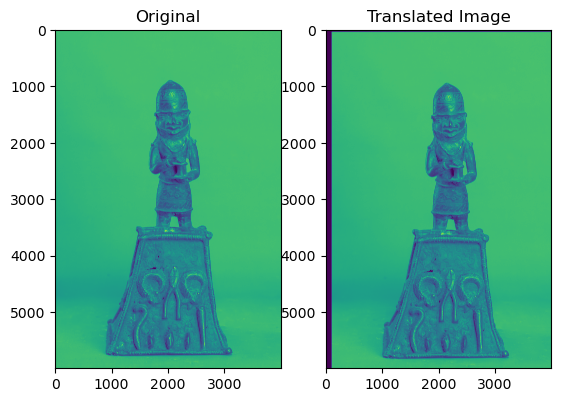

In [4]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

directory = r'C:\Users\NEW\Documents\SCHOOL\Year_4_semester_2\CSC 418\Practical\week_3\Project\shyllon_images'
os.chdir(directory)

#Defining functions for image transformation
def imageblurring(img):
    cv.imshow('Original Image', img)
    cv.waitKey(0)

    #Gaussian Blur
    Gaussian = cv.GaussianBlur(img, (7,7), 0)
    cv.imshow('Gaussian Blurring', Gaussian)
    cv.waitKey(0)

    #Median Blur
    median = cv.medianBlur(img, 5)
    cv.imshow('Median Blurring', median)
    cv.waitKey(0)

    #Bilateral Blur
    bilateral = cv.bilateralFilter(img, 9, 75, 75)
    cv.imshow("Bilateral Blurring", bilateral)
    cv.waitKey(0)
    cv.destroyAllWindows()

def shearingX(img):
    rows, cols = img.shape
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(img)

    M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
    sheared_img = cv.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))

    plt.subplot(1, 2, 2)
    plt.title("Sheared Image X-Axis")
    plt.imshow(sheared_img)

def shearingY(img):
    rows, cols = img.shape
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(img)

    M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
    sheared_img = cv.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))

    plt.subplot(1, 2, 2)
    plt.title("Sheared Image Y-Axis")
    plt.imshow(sheared_img)

def cropping(img):
    #Plot the original image
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(img)

    #Cropping out the image
    cropped_img = img[450:700, 200:500] 

    #Plot the cropped image
    plt.subplot(1, 2, 2)
    plt.title("Cropped Image")
    plt.imshow(cropped_img)

def rotation(img):
    rows, cols = img.shape

    #Plot the original shape
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(img)

    img_rotation = cv.warpAffine(img, cv.getRotationMatrix2D((cols/2, rows/2), 30, 0.6), (cols, rows))

    #Plot the rotated image
    plt.subplot(1, 2, 2)
    plt.title("Rotated Image")
    plt.imshow(img_rotation)

def reflection(img):
    #Plot the original image
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(img)
    
    rows, cols = img.shape
    
    M = np.float32([[1, 0, 0], [0, -1, rows], [0, 0, 1]])
    reflected_img = cv.warpPerspective(img, M, (int(cols), int(rows)))
    
    plt.subplot(1, 2, 2)
    plt.title("Reflected Image")
    plt.imshow(reflected_img)

def translation(img):
    rows, columns = img.shape

    #Plot the original shape
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(img)

    M = np.float32([[1, 0, 100], [0, 1, 50]])
    transl = cv.warpAffine(img, M, (columns, rows))

    #Plot the traslated image
    plt.subplot(1, 2, 2)
    plt.title("Translated Image")
    plt.imshow(transl)

def processing(found1 = False, found2 = False):
    email = str(input("Enter your email: "))
    age = int(input("Enter your age: "))
    if age > 18:
        print("The categories are:\n--  Contemporary\n--  Modern\n--  Traditional ")
        categories = os.listdir(directory) #Get a list with the names of all the categories
        category = str(input("Enter category: ")).lower()
        for cat in categories:
            if category == cat: 
                found1 = True
                print(f'\nHere are the images in the {category} category')
                images_list = os.listdir(f'{cat}')
                image_noformat = [im.split('.')[0] for im in images_list]
                print(image_noformat)
                selected_image = str(input("Enter the image you want to transform: "))
                for u in range(len(images_list)):
                    if selected_image == image_noformat[u]:
                        found2 = True
                        photo = cv.imread(f'{cat}/{images_list[u]}')
                        gray_img = cv.cvtColor(photo, cv.COLOR_BGR2GRAY) #convert to gray scale
                        print("\nNow that you have selected the image you want to transform,\nBelow are the image transfromations you can perform on this image:\n\n1. Image blurring \n2. Shearing on X-Axis \n3. Shearing on Y-Axis \n4. Cropping \n5. Rotation \n6. Reflection \n7. Translation\n\nNote: Please enter the number associated with the transformation to choose the one you desire.\n")
                        number = int(input("Enter number of transformation: "))
                        if number == 1:
                            imageblurring(photo)
                        elif number == 2:
                            shearingX(gray_img) 
                        elif number == 3:
                            shearingY(gray_img)
                        elif number == 4:
                            cropping(gray_img)
                        elif number == 5:
                            rotation(gray_img)
                        elif number == 6:
                            reflection(gray_img)
                        elif number == 7:
                            translation(gray_img)
                        else:
                            print(f'The number {number} is not here.\nPlease try again.')
                    else:
                        continue;                
            else:
                continue;
    else:
        found1 = True
        found2 = True
        print("\nYou have to be above 18 to use this application\nPlease try again")
    return found1, found2

found1, found2 = processing()
    
if not found1:
    print("\nCategory not found")
    found2 = True
    
if not found2:
    print("\nImage not found. Please try again")